# DSCI 324: Data Visualization
# Plotting with MatplotLib Homework

### Lauren Forti
### 3/27/2023

In [9]:
# imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
# load in data
df = pd.read_table('midwest.txt', sep = '\t')

# look at first few rows
df.head()

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [11]:
# look at data types
df.dtypes

Unnamed: 0                int64
PID                       int64
county                   object
state                    object
area                    float64
poptotal                  int64
popdensity              float64
popwhite                  int64
popblack                  int64
popamerindian             int64
popasian                  int64
popother                  int64
percwhite               float64
percblack               float64
percamerindan           float64
percasian               float64
percother               float64
popadults                 int64
perchsd                 float64
percollege              float64
percprof                float64
poppovertyknown           int64
percpovertyknown        float64
percbelowpoverty        float64
percchildbelowpovert    float64
percadultpoverty        float64
percelderlypoverty      float64
inmetro                   int64
category                 object
dot_size                float64
dtype: object

In [12]:
# change category column from object -> category
df['category'] = df['category'].astype('category')

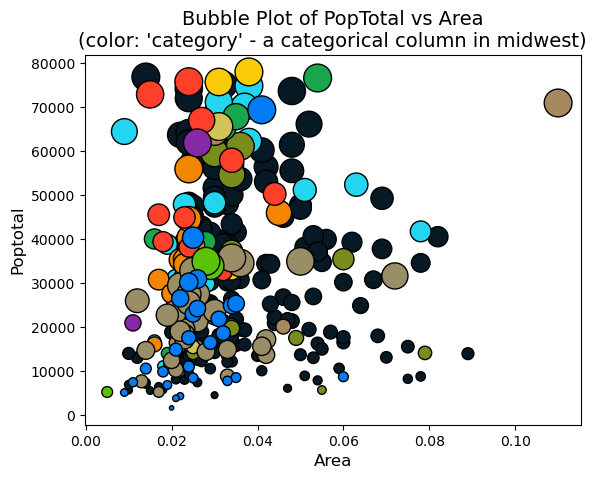

In [17]:
# extract category labels
cat = list(np.unique(df['category']))

for c in cat:
    # create random hex code
    unique_color = '#' + ''.join(random.sample('0123456789ABCDEF', 6))
    
    # subset df
    temp_df = df.loc[df['category'] == c]
    
    # make scatter plot
    plt.scatter(
        x = temp_df['area'],
        y = temp_df['poptotal'],

        # set color
        color = unique_color,
        edgecolor = 'black',
        s = temp_df['poptotal']/temp_df['poptotal'].max()*400
        )

# add titles
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'category' - a categorical column in midwest)", size = 14)

# add axis labels
plt.xlabel('Area', size = 12)
plt.ylabel('Poptotal', size = 12)

# save graph
plt.savefig('bubbleplot.png')

# display graph
plt.show()